# Preprocess CBC dataset from Zenodo
Link to the dataset:
[https://zenodo.org/record/4081318#.YZhDxoDMKV6](https://zenodo.org/record/4081318#.YZhDxoDMKV6)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn

Read the dataframe.

In [2]:
df_desc = pd.read_csv('../datasets/raw/zenodo/feature_desc.csv')
df_zenodo = pd.read_csv('../datasets/raw/zenodo/all_training.csv')
df_zenodo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1736 non-null   object 
 1   Sex         1736 non-null   float64
 2   Age         1682 non-null   float64
 3   CA          1643 non-null   float64
 4   CK          704 non-null    float64
 5   CREA        1662 non-null   float64
 6   ALP         1262 non-null   float64
 7   GGT         1300 non-null   float64
 8   GLU         1638 non-null   float64
 9   AST         1638 non-null   float64
 10  ALT         1640 non-null   float64
 11  LDH         1433 non-null   float64
 12  PCR         1639 non-null   float64
 13  KAL         1656 non-null   float64
 14  NAT         1663 non-null   float64
 15  UREA        1060 non-null   float64
 16  WBC         1673 non-null   float64
 17  RBC         1673 non-null   float64
 18  HGB         1673 non-null   float64
 19  HCT         1673 non-null  

Select only columns related with CBC test.

In [3]:
# Take only CBC columns
cbc_columns = list(df_desc.loc[df_desc['CBC features']==1]['Acronym'])
cbc_columns = [c for c in cbc_columns if c not in['MPV', 'RDW']] # This columns yield errors
df_zenodo = df_zenodo[cbc_columns]
print(f'CBC columns:\n{df_zenodo.columns}\n')

CBC columns:
Index(['WBC', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'NE', 'LY',
       'MO', 'EO', 'BA', 'NET', 'LYT', 'MOT', 'EOT', 'BAT', 'Age', 'Sex',
       'Suspect', 'target'],
      dtype='object')



Remove highly correlated features and Suspect - a feature that is not present in UCK data.

In [4]:
zenodo_cols_del = ['NET', 'RBC', 'HCT', 'MCH', 'NE', 'EO', 'LY', 'BA', 'MO', 'Suspect']
df_zenodo = df_zenodo.drop(zenodo_cols_del, axis=1)

# Calculate correlation
c = df_zenodo.corr().abs()
s = c.unstack()
s = s[s>0.4]
s = s[s<1]
so = s.sort_values(kind="quicksort")
print(f"Remaining columns: {df_zenodo.columns}")

Remaining columns: Index(['WBC', 'HGB', 'MCV', 'MCHC', 'PLT', 'LYT', 'MOT', 'EOT', 'BAT', 'Age',
       'Sex', 'target'],
      dtype='object')


Plot correlation matrix of the selected features.

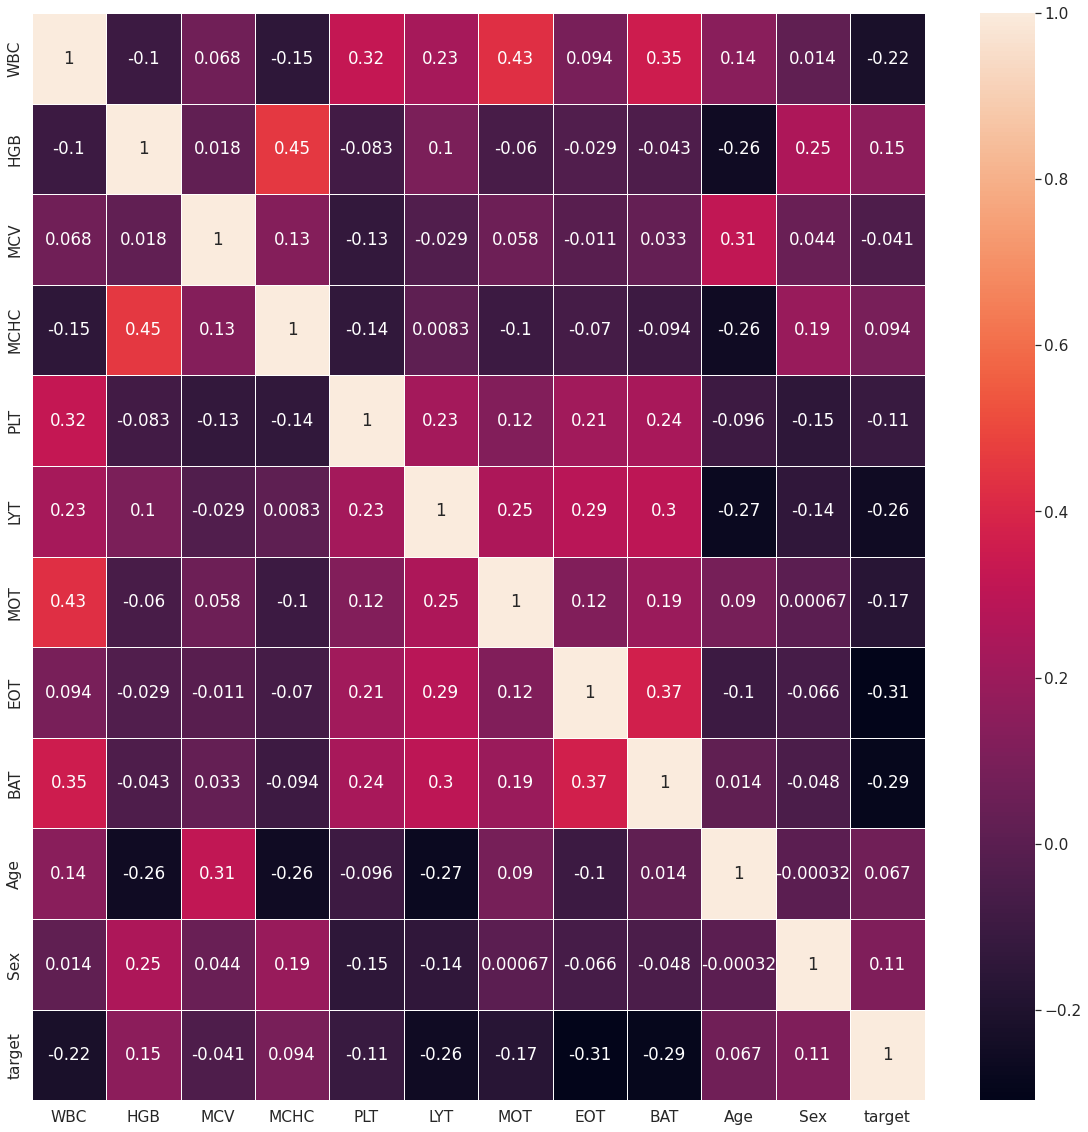

In [5]:
sn.set(font_scale=1.4) 
fig, ax = plt.subplots(figsize=(20,20))  
plot = sn.heatmap(df_zenodo.corr(), annot=True, linewidths=.5, ax=ax)

plot.figure.savefig('../results/zenodo_corr.png', facecolor='w')
plt.show()

Save processed dataframe.

In [ ]:
df_zenodo.to_csv('../datasets/processed/auxiliary/zenodo_detection.csv')

In [8]:
pd.pivot_table(df_zenodo, index=['target'], values=['BAT', 'EOT', 'LYT', 'MOT', 'HGB', 'MCHC', 'MCV', 'PLT', 'WBC',
       'Age', 'Sex'], aggfunc='count')

,Age,BAT,EOT,HGB,LYT,MCHC,MCV,MOT,PLT,Sex,WBC
target,,,,,,,,,,,
0,866,615,615,865,615,865,865,615,865,920,865
1,816,759,759,808,759,808,808,759,808,816,808
